# ***`MAP()`***

In [ ]:
meyveler = ["elma","muz","karpuz"]

bmeyve = list(map(str.upper,meyveler))
uzunluklar = list(map(len,meyveler))
print(bmeyve)
print(uzunluklar)

['ELMA', 'MUZ', 'KARPUZ']
[4, 3, 6]


In [ ]:
# kelimelerin ilk harfi

def ilkharf(meyve):
    return meyve[0]

ilkharfler = list(map(ilkharf,meyveler))
print(ilkharfler)

['e', 'm', 'k']


In [ ]:
#  listeyi aralarına virgül koyarak birlşeir ekrana yazdır

sayilar = [5,7,9,15]

sonuc = ",".join(map(str,sayilar))
print(sonuc)

5,7,9,15


# ***`DOSYA İŞLEMLERİ`***

In [ ]:
dosya = open("deneme.txt","w",encoding = "utf-8")
dosya.write("Merhaba Ömer\n")
dosya.write("Mehmet\n")
dosya.write("Ali")
dosya.close()

# ***`WITH`***

In [ ]:
with open("deneme.txt",mode = "r",encoding = "utf-8") as dosya:

  icerik = dosya.read()

  liste = dosya.readlines()
  print(liste)

  print(icerik)

[]
Merhaba Ömer
Mehmet
Ali


In [ ]:
# dosyada kaç karakter var
with open("deneme.txt","r" , encoding="utf-8") as dosya:
  icerik = dosya.read()
  print(len(icerik.strip()))

23


# ***`TABLO YAPMA`***

Oluşturulan notlar: [4, 4, 54, 90, 8, 13, 46, 29, 76, 82]


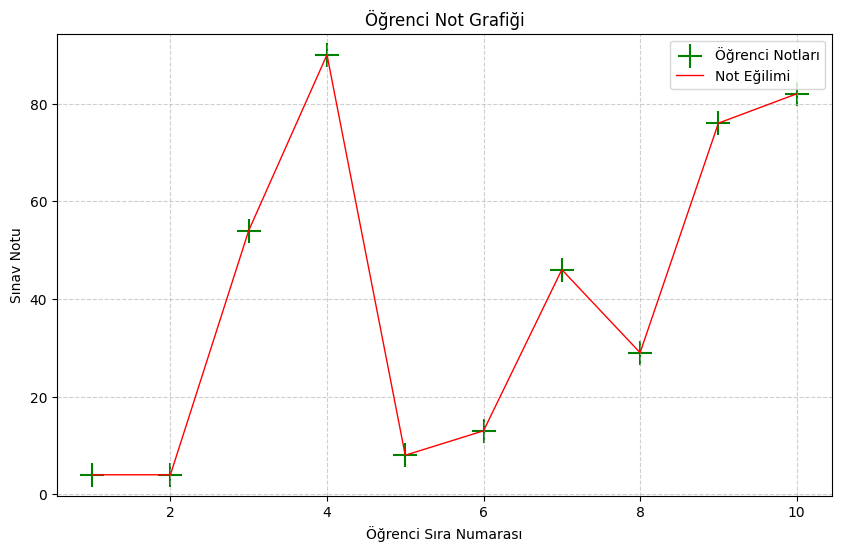

In [ ]:
import random
import matplotlib.pyplot as plt

# 1. Veri Oluşturma ve Dosyaya Yazma
# ------------------------------------

# 10 adet rastgele not oluşturuyoruz (1 ile 100 arasında)
notlar = []
for i in range(10):
    notlar.append(random.randint(1, 100))
print(f"Oluşturulan notlar: {notlar}")

# Notları "veri.txt" dosyasına her not bir satır olacak şekilde yazıyoruz
with open("veri.txt", "w") as veri:
    # notlar listesindeki sayıları önce string'e çevirip sonra \n ile birleştiriyoruz
    aktar = "\n".join(map(str, notlar))
    veri.write(aktar)

# 2. Veriyi Dosyadan Okuma ve Grafik Çizme
# ----------------------------------------

# Dosyadan notları okuyoruz
okunan_notlar_str = []
try:
    with open("veri.txt", "r") as veri:
        # readlines() ile dosyadaki her satırı bir liste elemanı olarak okuyoruz
        okunan_notlar_str = veri.readlines()
except FileNotFoundError:
    print("Hata: veri.txt dosyası bulunamadı.")
    exit() # Dosya yoksa programı sonlandır

# Dosyadan okunan string listesini temizleyip (boşlukları/yeni satırları kaldırıp)
# integer (tam sayı) listesine dönüştürüyoruz.
notlar_int = []
for satir in okunan_notlar_str:
    try:
        # .strip() ile satır sonundaki boşluk ve \n karakterini kaldırıyoruz
        # int() ile tam sayıya çeviriyoruz
        notlar_int.append(int(satir.strip()))
    except ValueError:
        # Sayı olmayan bir satır varsa hata vermesini önleriz
        print(f"Uyarı: '{satir.strip()}' değeri sayıya çevrilemedi ve atlandı.")

# Grafikteki X ekseni için öğrenci numaraları (1'den başlayarak)
# Notlar listesinin uzunluğuna göre dinamik olarak belirlenir.
xler = range(1, len(notlar_int) + 1)


# Grafik çizimi
plt.figure(figsize=(10, 6)) # Grafiğin boyutunu ayarla

# Dağılım Grafiği (Noktalar)
plt.scatter(
    xler,
    notlar_int,
    c="g",          # c = renk (g = green/yeşil)
    marker="+",     # marker = noktalama sembolü
    s=300,          # s = nokta boyutu
    label="Öğrenci Notları" # Açıklama ekle
)

# Çizgi Grafiği (Noktaları birleştirme)
plt.plot(
    xler,
    notlar_int,
    c="r",           # c = renk (r = red/kırmızı)
    linestyle="-",   # Çizgi stili (düz çizgi)
    linewidth=1,     # Çizgi kalınlığı
    label="Not Eğilimi" # Açıklama ekle
)

# Grafik etiketleri ve başlığı
plt.xlabel("Öğrenci Sıra Numarası")
plt.ylabel("Sınav Notu")
plt.title("Öğrenci Not Grafiği")
plt.legend() # Açıklamaları (label'ları) göster

# Izgara çizgileri ekleyelim
plt.grid(True, linestyle='--', alpha=0.6)

# Grafiği gösterme
plt.show()